### Computational Guided Inquiry for PChem (Neshyba & Guasco)

# Probability Densities

## Mathematical formulation

A probability density function describes the relative likelihood of a continuous random variable having a given value. For example, we can use the Boltzmann density function, $f_B$, to describe the x, y, or z-component of the velocity ($v_x$, $v_y$, or $v_z$). In addition to a velocity component, this function also depends on the temperature (*T*) and the molar mass of the molecule (*M*); we say it is *parameterized* by these quantitites.  The Boltzmann density function can be written as

$$
f_B(v_x) = N_Be^{-{ ( {\frac{M}{2RT}}} ) {v_x^2}} \ \ \ \   (1)  
$$

where we have written it as a function of the x-direction velocity component, $v_x$ (the y- and z-forms look very similar). The quantity $N_B$ is a normalization constant,

$$
N_B = {\big( {\frac{M}{2 \pi RT}} \big)}^{1/2}  \ \ \ \ (2)
$$

Similarly, the Maxwell density function is written

$$
f_M(v) = N_Mv^2e^{-{( \frac{M}{2RT}} ) {v^2}} \ \ \ \ (3)
$$

with a normalization constant of

$$
N_M = 4 \pi \big( {{\frac{M}{2 \pi RT}} \big)}^{3/2} \ \ \ \ (4) 
$$

For a given molar mass, we can think of these functions as surfaces in two dimensions, (1) the velocity component or speed and (2) the temperature. A shorthand for these surfaces would be $f_B(v_x,T)$ or $f_M(v,T)$.  What do such surfaces look like?  One is shown in the figure below.  Such figures are useful for developing an intuition about how molecules move; for example, it is evident from the figure that molecules exhibit a broader distribution of velocities at higher temperature.

<p style='text-align: center;'>
<img src="fbsurface.jpg" height="700" width="700"/>  

<p style='text-align: center;'>
<strong>Figure 1</strong>. Probability density as a function of velocity and temperature.
    
## Units
As it turns out, the dimensions of $f_B$ and $f_M$ are the same: it's the inverse of speed. There's a reason for that, that we'll get to later. For now we'll just note that it'll be convenient to use SI for the calculations here, which means the units of $f_B$ and $f_M$ will be $s/m$. As you'll see below, we'll be doing some conversions on occasion to make sure this is the case.

## Learning Goals
1. Explain the difference between a velocity component ($v_x$, $v_y$, or $v_z$) and a speed ($v$), including the physically possible ranges of each.
1. Explain which probability density ($f_B$ or $f_M$) is appropriate for which of the above (velocity component or speed). 
1. Calculate $f_B(v_x)$ and $f_M(v)$.
1. Sketch $f_B(v_x)$ and $f_M(v)$, including how they change at higher temperatures. 

In [1]:
# Import resources - execute 2x if you want interactive graphics
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

### Specifying constants for our plots
The cell below lays out some constants for all our plots.

In [2]:
# Moles 
n = AssignQuantity(1,"mol")
print(n)

# Gas constant
R = AssignQuantity(8.314, "J/(mol K)")
print(R)

# Mass in g/mol (converting to SI)
M = AssignQuantity(28,'g/mol')
M.ito_base_units()
print(M)

1 mole
8.314 joule / kelvin / mole
0.028 kilogram / mole


### Calculating $f_B(T, v_x)$

To calculate the Boltzmann probability density, we have to specify some additional parameters. We do this in the cell below. 

In [3]:
# Temperature
T = AssignQuantity(298, "K")
print(T)

# Velocity component in the x-direction
vx = AssignQuantity(500,"m/s")
print(vx)

# Here's the exponential D-factor
D = M/(2*R*T)
print(D)

# Here's the normalization constant
NB = np.sqrt(M/(2*np.pi*R*T))
print(NB)

# Now the Boltzmann function
fB = NB * np.exp(-D*vx**2)
print(fB)

# This converts fB into seconds/meter (should be numerically equal to base units)
fB.ito("s/m")
print(fB)

298 kelvin
500 meter / second
5.6506935015410245e-06 kilogram / joule
0.0013411456316653346 kilogram ** 0.5 / joule ** 0.5
0.0003265575188853833 kilogram ** 0.5 / joule ** 0.5
0.0003265575188853832 second / meter


### Your turn
OK, do the same for $f_M(T,v)$. Differences will be: 

- Instead of a velocity component, we'll use a speed ("v") of $500 \ {m\over s}$. Do this using AssignQuantity.
- There's a different normalization constant (see the introduction)
- As with fB, convert fM to seconds/meter 

In [4]:
# Temperature
### BEGIN SOLUTION
T = AssignQuantity(298, "K")
print(T)
### END SOLUTION

# Speed in the x-direction
### BEGIN SOLUTION
v = AssignQuantity(500,"m/s")
print(v)
### END SOLUTION

# The exponential D-factor
### BEGIN SOLUTION
D = M/(2*R*T)
### END SOLUTION

# The normalization factor
### BEGIN SOLUTION
NM = 2**.5*M**(3/2)*R**(-3/2)*T**(-3/2)*np.pi**(-0.5)
### END SOLUTION

# Now the Maxwell probability density
### BEGIN SOLUTION
fM= NM*v**2*np.exp(-D*v**2)
print(fM)
### END SOLUTION

# Convert fM into seconds/meter (should be numerically equal to base units)
### BEGIN SOLUTION
fM.ito("s/m")
print(fM)
### END SOLUTION

298 kelvin
500 meter / second
0.0018452764498449957 kilogram ** 1.5 * meter ** 2 / joule ** 1.5 / second ** 2
0.0018452764498449957 second / meter


### Visualizing $f_B(T,v_x)$
Our next objective is to get Python to display the probability density function $f_B(T,v_x)$. The cell below does this. 

Also, we've tried to keep the variable names as simple as possible, but just just to be clear, the variables T, vx, D, NB, and fB are all *grids* (2-dimensional arrays).

shape of fB= (40, 60)


Text(0.5, 0, 'fB')

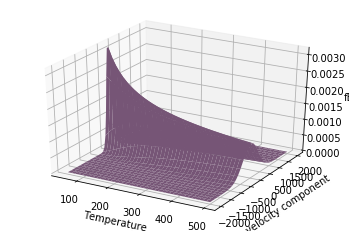

In [5]:
# Making the grids
T,vx = PL.Statespace([50,500,40],[-2000,2000,60])

# Attaching units
T = AssignQuantity(T,"K")
vx = AssignQuantity(vx,"m/s")

# Calculate grids of "D" and the normalization constant
D = M/(2*R*T)
NB = np.sqrt(M/(2*np.pi*R*T))

# Get the probability density for every point on the grid
fB = NB * np.exp(-D*vx**2)
print("shape of fB=",np.shape(fB))

# Prepping the axis labels
xlabel = "Temperature"
ylabel = "velocity component"
zlabel = "fB"

# Graph the probability density
ax = PL.plot_surface(T, vx, fB, color='plum') # Make the mesh plot
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

### Your turn
Now do something similar, but for $f_M(v)$. There will be some changes you'll need to pay attention to, mainly about the speed. The main point is, speeds are, by definition, non-negative (you can't ride a bicycle car at "-10 mph". Because of this, your state space should specify velocities from 0 to 2000 m/s.

Just to help keep track of the names of all these (all for the Maxwell distribution):

- T is a grid of temperatures 
- v is a grid of speeds
- DM is a grid of D-values
- NM is a grid of normalization constants
- fM is a grid of probability densities

shape of fM= (40, 60)


Text(0.5, 0, 'fM')

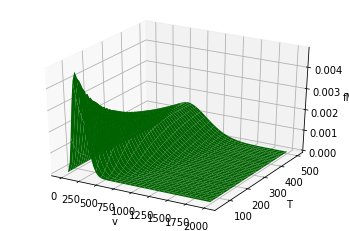

In [6]:
# Making the grids
### BEGIN SOLUTION
T,v = PL.Statespace([50,500,40],[0,2000,60])
### END SOLUTION

# Attaching units
### BEGIN SOLUTION
T = AssignQuantity(T,"K")
v = AssignQuantity(v,"m/s")
### END SOLUTION

# Calculate grids of "D" and the normalization constant
### BEGIN SOLUTION
DM = M/(2*R*T)
NM = 2**.5*M**(3/2)*R**(-3/2)*T**(-3/2)*np.pi**(-0.5)
### END SOLUTION

# Get the probability density for every point on the grid
### BEGIN SOLUTION
fM= NM*v**2*np.exp(-DM*v**2)
print("shape of fM=",np.shape(fM))
### END SOLUTION

# Prepping the axis labels
### BEGIN SOLUTION
xlabel = "v"
ylabel = "T"
zlabel = "fM"
### END SOLUTION

# Graph the pressure
### BEGIN SOLUTION
ax = PL.plot_surface(v, T, fM, color='green') # Make the mesh plot
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
### END SOLUTION

### Pause for Analysis
In your paper notebook, sketch $f_B(T,v_x)$ and $f_M(T,v)$, with axes labeled.

### Refresh/save/validate
Almost done! To double-check everything is OK, repeat the "Three steps for refreshing and saving your code," and press the "Validate" button (as usual).

### Close/submit/logout
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page